

Assignment 1, Varun Vashishtha, 2022201061

1. [1.5 points] Now repeat the camera calibration process for calib-object.jpg using OpenCV calibration functions,
continue to assume that there is no skew or distortion (Hint: see calibrateCamera() FLAGS). How does
your result compare with Q1 above? Repeat the overlay of the wireframe using the new parameters. Describe
your observations.

Answer : Now the answer is little bit more perfect or somewhat similar to the previous answers.

In [67]:
import numpy as np
import cv2 as cv
import glob
import matplotlib.pyplot as plt


In [69]:


criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
objp = np.zeros((8*8,3), np.float32)
objp[:,:2] = np.mgrid[0:8,0:8].T.reshape(-1,2)
worldpoints = []
worldpoints.append(objp)
imgpoints = []
# images = glob.glob('img_with_corners.jpg')
img = cv2.imread("calib-object.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


In [70]:

np.mgrid[0:8,0:8].T.reshape(-1,2).shape

(64, 2)

In [71]:
print(gray.shape )

left_img, right_img = gray[:, :1545], gray[:, :1545]

(4160, 3120)


(<matplotlib.image.AxesImage at 0x179e43aaf90>, Text(0.5, 1.0, 'GRAY IMAGE'))

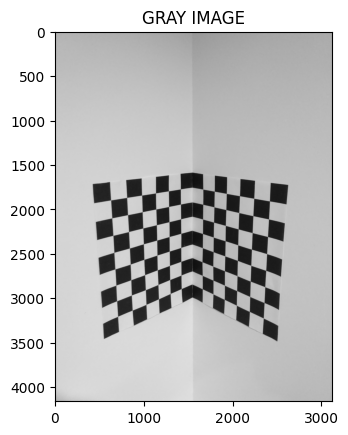

In [75]:

plt.imshow(cv.cvtColor(gray, cv.COLOR_BGR2RGB)), plt.title('GRAY IMAGE')

FINDING CORNERS OF LEFT PART PF IMAGE

In [74]:
ret, corners_left = cv2.findChessboardCorners(left_img, (6, 8))

In [12]:
print(corners_left.shape, corners_left)

(48, 1, 2) [[[ 629.      1904.     ]]

 [[ 809.5     1874.5    ]]

 [[ 976.6225  1851.3882 ]]

 [[1133.5     1825.5    ]]

 [[1276.4712  1803.9137 ]]

 [[1411.5     1780.     ]]

 [[ 641.5     2105.5    ]]

 [[ 819.5     2070.     ]]

 [[ 983.5     2037.     ]]

 [[1137.3579  2004.9575 ]]

 [[1278.7343  1976.629  ]]

 [[1413.      1951.     ]]

 [[ 653.0085  2303.6667 ]]

 [[ 830.5     2260.     ]]

 [[ 991.0104  2218.0835 ]]

 [[1142.5     2183.     ]]

 [[1284.      2149.     ]]

 [[1413.7006  2115.3416 ]]

 [[ 668.      2491.     ]]

 [[ 840.      2445.     ]]

 [[ 998.8345  2398.4304 ]]

 [[1146.5     2356.     ]]

 [[1283.9174  2314.329  ]]

 [[1415.8464  2281.1108 ]]

 [[ 679.      2682.     ]]

 [[ 849.5     2625.5    ]]

 [[1002.5     2572.5    ]]

 [[1147.3892  2523.531  ]]

 [[1287.      2479.5    ]]

 [[1417.      2438.     ]]

 [[ 689.      2859.     ]]

 [[ 855.31903 2803.5503 ]]

 [[1011.5     2744.     ]]

 [[1151.4114  2691.33   ]]

 [[1289.5     2640.5    ]]

 [[1416.0

RIGHT IMAGE CORNERS

In [77]:
ret, corners_right = cv2.findChessboardCorners(right_img, (6, 8))

In [78]:
corners_right.shape, corners_right

((48, 1, 2),
 array([[[ 629.     , 1904.     ]],
 
        [[ 809.5    , 1874.5    ]],
 
        [[ 976.6225 , 1851.3882 ]],
 
        [[1133.5    , 1825.5    ]],
 
        [[1276.4712 , 1803.9137 ]],
 
        [[1411.5    , 1780.     ]],
 
        [[ 641.5    , 2105.5    ]],
 
        [[ 819.5    , 2070.     ]],
 
        [[ 983.5    , 2037.     ]],
 
        [[1137.3579 , 2004.9575 ]],
 
        [[1278.7343 , 1976.629  ]],
 
        [[1413.     , 1951.     ]],
 
        [[ 653.0085 , 2303.6667 ]],
 
        [[ 830.5    , 2260.     ]],
 
        [[ 991.0104 , 2218.0835 ]],
 
        [[1142.5    , 2183.     ]],
 
        [[1284.     , 2149.     ]],
 
        [[1413.7006 , 2115.3416 ]],
 
        [[ 668.     , 2491.     ]],
 
        [[ 840.     , 2445.     ]],
 
        [[ 998.8345 , 2398.4304 ]],
 
        [[1146.5    , 2356.     ]],
 
        [[1283.9174 , 2314.329  ]],
 
        [[1415.8464 , 2281.1108 ]],
 
        [[ 679.     , 2682.     ]],
 
        [[ 849.5    , 2625.5    ]],
 

In [79]:
imgpoints_left = []
imgpoints_right = []

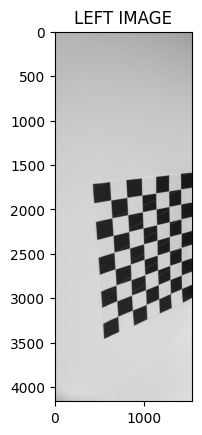

In [80]:
if ret == True:
    cv2.cornerSubPix(gray, corners_left[:4], (100, 100), (-1,-1), criteria)
    imgpoints_left.append(corners_left)
    # Draw and display the corners_left
    cv2.drawChessboardCorners(left_img, (7,6), corners_left, ret)
    resize_factor = 1  # Adjust this factor as needed
    height, width = left_img.shape[0], left_img.shape[1]
    left_img = cv2.resize(left_img, (int(width * resize_factor), int(height * resize_factor)))
    cv2.imshow('left_img',left_img)
    cv2.imwrite('corners_left_detected.jpg', left_img, None)
    plt.imshow(cv.cvtColor(left_img, cv.COLOR_BGR2RGB)), plt.title('LEFT IMAGE')

    cv2.waitKey(0)
cv2.destroyAllWindows()


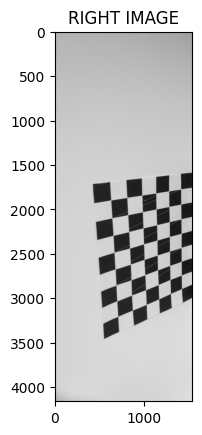

In [81]:
if ret == True:
    cv2.cornerSubPix(gray, corners_right[:4], (100, 100), (-1,-1), criteria)
    imgpoints_right.append(corners_right)
    # Draw and display the corners_right
    cv2.drawChessboardCorners(right_img, (7,6), corners_right, ret)
    resize_factor = 1  # Adjust this factor as needed
    height, width = right_img.shape[0], right_img.shape[1]
    right_img = cv2.resize(right_img, (int(width * resize_factor), int(height * resize_factor)))
    cv2.imshow('right_img',right_img)
    cv2.imwrite('corners_right_detected.jpg', right_img, None)
    plt.imshow(cv.cvtColor(right_img, cv.COLOR_BGR2RGB)), plt.title('RIGHT IMAGE')

    cv2.waitKey(0)
cv2.destroyAllWindows()


MAPPING WORLD TO IMAGE COORDINATES CORNER FOUND ABOVE

In [82]:
worldpoints_left = []

for y in range(2, 18, 2):
    for x in range(2, 14, 2):
        worldpoints_left.append([x, y, 0])

# for y in range(2, 18, 2):
#     for x in range(2, 14, 2):
#         worldpoints_left.append([x, y, 0])

In [83]:
np.array(worldpoints_left).shape
# worldpoints_left

(48, 3)

In [84]:
imgpoints_left[0].shape

(48, 1, 2)

In [85]:
np.array(worldpoints).shape, np.array(imgpoints_left).shape

((1, 64, 3), (1, 48, 1, 2))

In [26]:
# worldpoints_right = []

# for y in range(2, 18, 2):
#     for x in range(2, 14, 2):
#         worldpoints_right.append([0, y, x])

# worldpoints_right
# np.array(temp1).shape

In [86]:
np.array(worldpoints_left).shape, np.array(np.squeeze(imgpoints_left).tolist()).shape

temp = np.array(np.squeeze(imgpoints_left).tolist())


In [87]:
temp1 = []

for te in temp:
    temp1.append([te])
temp1 = [temp1]

worldpoints_left = np.array([worldpoints_left], dtype = np.float32)
temp1 = np.array(temp1, dtype = np.float32)

In [88]:
worldpoints_left.shape, temp1.shape

((1, 48, 3), (1, 48, 1, 2))

In [89]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(worldpoints_left, temp1, (4160, 3120), None, None, flags=cv2.CALIB_FIX_ASPECT_RATIO)

In [90]:
ret, mtx, dist, rvecs, tvecs 

(1.976470168221396,
 array([[3.95683308e+03, 0.00000000e+00, 1.85990601e+03],
        [0.00000000e+00, 3.95683308e+03, 1.80573919e+03],
        [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]]),
 array([[ 0.42106857, -1.39740234, -0.04426392,  0.03519881,  2.39404763]]),
 (array([[ 0.19906516],
         [-0.848482  ],
         [-0.06318989]]),),
 (array([[-13.01292284],
         [ -0.60911552],
         [ 35.67482729]]),))

In [91]:
R = cv2.Rodrigues(rvecs[0])[0]
t = tvecs[0]
Rt = np.concatenate([R,t], axis = -1)
projection_matrix = np.matmul(mtx, Rt)

print(Rt)

[[ 6.60495218e-01 -2.37629784e-02 -7.50454121e-01 -1.30129228e+01]
 [-1.34663000e-01  9.79542942e-01 -1.49537623e-01 -6.09115518e-01]
 [ 7.38655497e-01  1.99827288e-01  6.43783436e-01  3.56748273e+01]]


In [92]:
projection_matrix

array([[ 3.98729913e+03,  2.77633836e+02, -1.77204501e+03,
         1.48618623e+04],
       [ 8.00980165e+02,  4.23672388e+03,  5.70809565e+02,
         6.20092653e+04],
       [ 7.38655497e-01,  1.99827288e-01,  6.43783436e-01,
         3.56748273e+01]])

In [93]:
import numpy as np
import cv2

# Example projection matrix (replace with your estimated matrix)

def plot_image(projection_matrix, world_coordinates, image_name = 'calib-object.jpg'):
    P = projection_matrix
    K = mtx
    for val in world_coordinates:
        val[2] = -1*val[2]
    wireframe_points_3d = world_coordinates
    wireframe_points_homogeneous = np.hstack((wireframe_points_3d, np.ones((wireframe_points_3d.shape[0], 1))))

    print("Shape :",  wireframe_points_homogeneous.shape, K.shape, P.shape)
    wireframe_points_2d = np.dot(P, wireframe_points_homogeneous.T)
    temp = wireframe_points_2d
    # for val in wireframe_points_2d:
    #     val[2] = -1*val[2]
    wireframe_points_2d = wireframe_points_2d.T
    print(wireframe_points_2d)
    new_mat = []
    for val in wireframe_points_2d:
        new_mat.append([int(val[0]/val[2]), int(val[1]/val[2])])
    new_mat = np.array(new_mat)
    img = cv2.imread(image_name)
    size = len(world_coordinates)
    print("new_mat :", new_mat)

    for i in range(size):
        cv2.circle(img, tuple(new_mat[i].astype(int)), 5, (0, 255, 0), 1)

    # Draw lines between wireframe points to form the wireframe
    add = 0
    for i in range(size):
        # add += 4
        cv2.line(img, tuple(new_mat[i].astype(int)), tuple(new_mat[(i+1)%size].astype(int)), (0, 255, 255), 20)

    resize_factor = 0.2  
    height, width = img.shape[0], img.shape[1]
    resized_img = cv2.resize(img, (int(width * resize_factor), int(height * resize_factor)))
    cv2.imshow('Image', resized_img)
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)), plt.title('IMAGE')

    cv2.waitKey(0)
    cv2.destroyAllWindows()




Shape : (6, 4) (3, 3) (3, 4)
[[1.48618623e+04 6.20092653e+04 3.56748273e+01]
 [7.06840501e+04 7.32229876e+04 4.60160042e+01]
 [9.54926801e+04 6.52316536e+04 3.70030361e+01]
 [1.00490089e+05 1.41492683e+05 4.05999273e+01]
 [7.56814591e+04 1.49484017e+05 4.96128954e+01]
 [1.98592713e+04 1.38270295e+05 3.92717185e+01]]
new_mat : [[ 416 1738]
 [1536 1591]
 [2580 1762]
 [2475 3485]
 [1525 3013]
 [ 505 3520]]


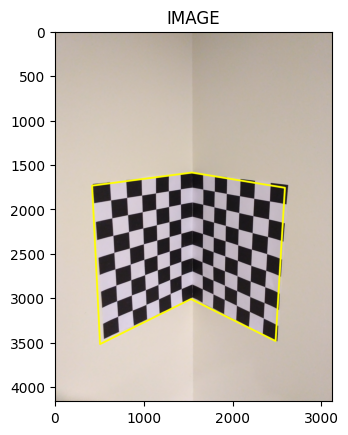

In [94]:
# world_coordinates = np.array([[ 0, 18, 0], [ 0, 0, 0], [ 0, 0, -18], [14, 0, -18], [14, 0, 0], [14, 18, 0]], dtype=np.float32)
world_coordinates = np.array([[ 0, 0, 0], [14, 0, 0], [14, 0, 14], [14, 18, 14], [14, 18, 0], [0, 18, 0]], dtype=np.float32)

# world_coordinates = np.array([[0, 18, 0], [ 0, 0, 0], [], [], [14, 0, 0], [14, 18, 0]], dtype=np.float32)

plot_image(projection_matrix, world_coordinates, 'calib-object.jpg')

2. [1 point] Repeat Q2.1, for the second image assign1.jpg. Does the wireframe overlay show significant distortions?
Comment. What can we say about the computed projection matrix when trying to do calibration based
on world coordinate points that are co-planar? (Hint: we looked at co-planar points in two-view geometry).






ANSWER : Wireframe do not show any significant distortions but When dealing with coplanar points in two-view geometry, such as in a planar image, the computed projection matrix may not accurately represent the true geometry due to the inherent ambiguity in the calibration process. This ambiguity arises because multiple projection matrices can yield the same image coordinates for coplanar points.

In practical terms, this means that when attempting to calibrate a camera using coplanar points, the resulting projection matrix may not accurately capture the true relationship between the world coordinates and the image coordinates. As a result, the wireframe overlay on the image may exhibit distortions or inaccuracies, especially if the coplanar points are not well-distributed or if the calibration process lacks sufficient constraints to resolve the ambiguity.

Therefore, when working with coplanar points in calibration, it's essential to carefully consider the geometric properties of the scene and apply additional constraints or techniques to improve the accuracy of the calibration process and reduce distortions in the resulting wireframe overlay.

In [95]:
import numpy as np
import cv2
import glob
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
objp = np.zeros((5*5,3), np.float32)
objp[:,:2] = np.mgrid[0:5,0:5].T.reshape(-1,2)
worldpoints = []
worldpoints.append(objp)
imgpoints = []
# images = glob.glob('img_with_corners.jpg')
img = cv2.imread("assign1.jpg")
resize_factor = 0.2  # Adjust this factor as needed
height, width = img.shape[0], img.shape[1]
img1 = cv2.resize(img, (int(width * resize_factor), int(height * resize_factor)))
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# cv2.imshow('gray',gray)
cv2.imwrite('gray.jpg', gray, None)
cv2.waitKey(0)


-1

In [96]:
image_assign = cv2.imread('assign1.jpg')
gray_assign = cv2.cvtColor(image_assign, cv2.COLOR_BGR2GRAY)
pattern=(5,5)  

flags = cv2.CALIB_CB_EXHAUSTIVE + cv2.CALIB_CB_ACCURACY
ret, corners = cv2.findChessboardCorners(gray_assign, pattern, flags=flags)


if ret:
    image_with_corners_assign = cv2.drawChessboardCorners(image_assign, pattern, corners, ret)
    cv2.imwrite('assign_corners.jpg', image_with_corners_assign)

else:
    print("Not found.")

In [97]:
worldpoints = []
imagepoints = []

for corner in corners:
    imagepoints.append(corner)
imagepoints = [imagepoints]


for y in range(2, 11, 2):
    for x in range(2, 11, 2):
        worldpoints.append([x, y, 0])

worldpoints = [worldpoints]


In [98]:


worldpoints = np.array(worldpoints, dtype = np.float32)
imagepoints = np.array(imagepoints, dtype = np.float32)

worldpoints.shape, imagepoints.shape

((1, 25, 3), (1, 25, 1, 2))

In [99]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(worldpoints, imagepoints, (img.shape[0], img.shape[1]), None, None, flags=cv2.CALIB_FIX_ASPECT_RATIO)


In [100]:
R = cv2.Rodrigues(rvecs[0])[0]
t = tvecs[0]
Rt = np.concatenate([R,t], axis = -1)
projection_matrix = np.matmul(mtx, Rt)

print(projection_matrix)

[[ 3.45442860e+03 -9.51137199e+02  3.63881459e+02  5.82991151e+04]
 [-4.42125619e+01  4.22966725e+02  3.67126523e+03  5.96422742e+04]
 [-8.67856413e-02 -9.11477460e-01  4.02090900e-01  7.51585145e+01]]


In [107]:
import numpy as np
import cv2

# Example projection matrix (replace with your estimated matrix)

def plot_images(projection_matrix, world_coordinates, image_name = 'calib-object.jpg'):

    P = projection_matrix
    K = mtx
    wireframe_points_3d = world_coordinates

    wireframe_points_homogeneous = np.hstack((wireframe_points_3d, np.ones((wireframe_points_3d.shape[0], 1))))

    print("Shape :",  wireframe_points_homogeneous.shape, K.shape, P.shape)
    wireframe_points_2d = np.dot(P, wireframe_points_homogeneous.T)
    temp = wireframe_points_2d
    
    wireframe_points_2d = wireframe_points_2d.T
    print(wireframe_points_2d)
    new_mat = []
    for val in wireframe_points_2d:
        new_mat.append([int(val[0]/val[2]), int(val[1]/val[2])])
    new_mat = np.array(new_mat)
    img = cv2.imread(image_name)
    size = len(world_coordinates)
    print("new_mat :", new_mat)
    
    # Overlay the wireframe on the actual image
    for i in range(size):
        cv2.circle(img, tuple(new_mat[i].astype(int)), 5, (0, 255, 0), -1)

    # Draw lines between wireframe points to form the wireframe
    for i in range(size):
        cv2.line(img, tuple(new_mat[i].astype(int)), tuple(new_mat[(i+1)%size].astype(int)), (0, 255, 255), 10)

    # Display the image with overlay
    resize_factor = 0.2  # Adjust this factor as needed
    height, width = img.shape[0], img.shape[1]
    resized_img = cv2.resize(img, (int(width * resize_factor), int(height * resize_factor)))
    cv2.imshow('Image', resized_img)
    cv2.imwrite('ques2_part2_wireframe.jpg', img, None)
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)), plt.title('Image')
    # plt.imshow(img)
    

    cv2.waitKey(0)
    cv2.destroyAllWindows()




Shape : (4, 4) (3, 3) (3, 4)
[[5.82991151e+04 5.96422742e+04 7.51585145e+01]
 [9.97522584e+04 5.91117235e+04 7.41170868e+01]
 [8.83386120e+04 6.41873242e+04 6.31793573e+01]
 [4.68854688e+04 6.47178749e+04 6.42207850e+01]]
new_mat : [[ 775  793]
 [1345  797]
 [1398 1015]
 [ 730 1007]]


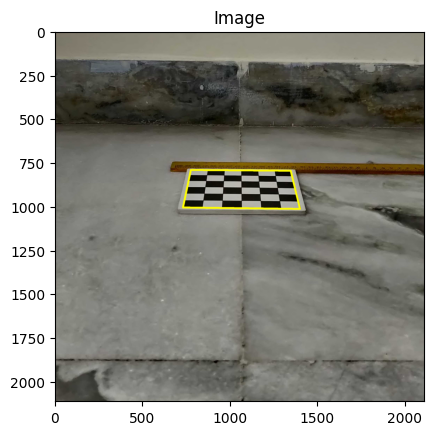

In [108]:
# world_coordinates = np.array([[0, 0, 0], [0, 12, 0], [12, 12, 0], [12, 0, 0]], dtype=np.float32)
world_coordinates = np.array([[0, 0, 0], [12, 0, 0], [12, 12, 0], [0, 12, 0]], dtype=np.float32)
plot_images(projection_matrix, world_coordinates, 'assign1.jpg')



PART 3 : What is the image of the world origin, given the calibration matrix? Does this result agree with your
observations?

Answer : below shown the projection of the point of the owrld coordinates on the image yes its matching with the observation

In [111]:
import numpy as np
import cv2

# Example projection matrix (replace with your estimated matrix)

def plot_point(projection_matrix, world_coordinates, image_name = 'calib-object.jpg'):

    P = projection_matrix

    # Extract intrinsic matrix K from P
    K = mtx

    wireframe_points_3d = world_coordinates

    wireframe_points_homogeneous = np.hstack((wireframe_points_3d, np.ones((wireframe_points_3d.shape[0], 1))))

    wireframe_points_2d = np.dot(P, wireframe_points_homogeneous.T)
    temp = wireframe_points_2d
    wireframe_points_2d = wireframe_points_2d.T
    # print(wireframe_points_2d)
    new_mat = []
    for val in wireframe_points_2d:
        new_mat.append([int(val[0]/val[2]), int(val[1]/val[2])])
    new_mat = np.array(new_mat)
    img = cv2.imread(image_name)
    size = len(world_coordinates)
    # print("new_mat :", new_mat)
    # Overlay the wireframe on the actual image
    for i in range(size):
        cv2.circle(img, tuple(new_mat[i].astype(int)), 5, (0, 255, 0), -1)

    # Draw lines between wireframe points to form the wireframe
    for i in range(size):
        cv2.line(img, tuple(new_mat[i].astype(int)), tuple(new_mat[(i+1)%size].astype(int)), (123, 255, 123), 10)

    # Display the image with overlay
    resize_factor = 0.2  # Adjust this factor as needed
    height, width = img.shape[0], img.shape[1]
    resized_img = cv2.resize(img, (int(width * resize_factor), int(height * resize_factor)))
    cv2.imshow('Image', resized_img)
    cv2.imwrite('ques2_part2_wireframe.jpg', img, None)
    # plt.imshow(img)
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)), plt.title('Image')
    cv2.waitKey(0)
    cv2.destroyAllWindows()




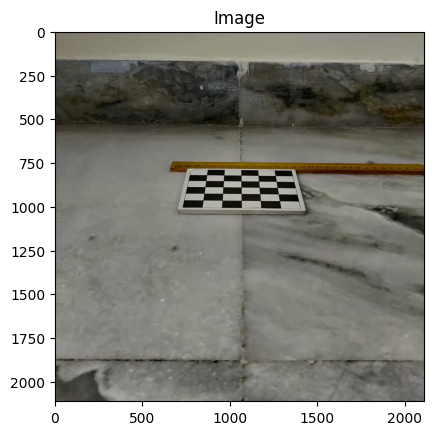

In [110]:
world_coordinates = np.array([[0, 0, 0]], dtype=np.float32)
plot_point(projection_matrix, world_coordinates, 'assign1.jpg')

Challenges and problems : 
1) understanding the problem and how to get world and image coordinates
2) Understanding how to use various opencv functions eg findChessboardCorners, alliberateCamera etc
3) plotting the wireframe on the image means how to plot a new thing on the same image 
4) selecting what algorithm to use
5) Troubleshooting and Debugging ate a lot of time
6) handling sigle plane points 

Learnings : 
From the above assignments involving camera calibration, projection matrices, wireframe overlay, and chessboard pattern projection, several key learning points can be derived:

Camera Calibration: Understanding the process of camera calibration is crucial for obtaining accurate intrinsic and extrinsic camera parameters. This involves capturing calibration images with known calibration patterns, detecting feature points, and estimating the camera parameters using calibration algorithms.

Projection Matrices: Learning about projection matrices and their role in transforming 3D world coordinates into 2D image coordinates is essential. This includes understanding how intrinsic and extrinsic parameters are combined to form the projection matrix and how it is used to project points onto the image plane.

Wireframe Overlay: Overlaying wireframe models onto images provides a visual representation of 3D objects in the image. This involves transforming 3D object coordinates into 2D image coordinates using projection matrices and rendering wireframe models onto images using appropriate rendering techniques.

Chessboard Pattern Projection: Projecting chessboard patterns onto images serves as a calibration step to validate the accuracy of camera calibration. This involves projecting known patterns onto images using projection matrices and comparing the projected patterns with detected feature points.

Ambiguity and Challenges: Dealing with ambiguity and challenges in camera calibration, such as coplanar points, lens distortion, and noise, requires careful consideration and appropriate handling techniques. This includes understanding the limitations and potential sources of error in the calibration process.

Visualization and Interpretation: Visualizing and interpreting the results of camera calibration, wireframe overlay, and pattern projection are essential for understanding the geometric relationships between 3D objects and 2D images. This involves analyzing visualizations and drawing conclusions about the accuracy and reliability of the calibration process.

Practical Skills: Developing practical skills in computer vision, image processing, and geometric transformations is essential for implementing calibration algorithms, projection techniques, and rendering methods effectively.

Overall, the assignments provide valuable insights into the theoretical concepts and practical aspects of camera calibration and geometric transformations, enhancing understanding and proficiency in computer vision and image processing tasks.